In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from workflow.scripts import helper_func as hf

In [2]:
name = "oqs_persistent_101_10"
df = pd.read_csv(f"results/master/{name}/mapped_all.csv")

In [3]:
df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'window',
       'dam_strand', 'HX64_12_rep1', 'HX64_12_rep2', 'HXC_12_rep1',
       'HXC_12_rep2', 'HD64_0_rep1', 'HD64_0_rep2', 'HDC_0_rep1', 'HDC_0_rep2',
       'HD64_0_rep3', 'HDC_0_rep3', 'HD64_15_rep1', 'HDC_15_rep1',
       'HD64_30_rep2', 'HDC_30_rep2', 'HD64_60_rep2', 'HDC_60_rep2',
       'HD64_240_rep1', 'HDC_240_rep1', 'HD64_480_rep1', 'HDC_480_rep1',
       'HX64_12_rep1_sim', 'HX64_12_rep2_sim', 'HXC_12_rep1_sim',
       'HXC_12_rep2_sim', 'HD64_0_rep1_sim', 'HD64_0_rep2_sim',
       'HDC_0_rep1_sim', 'HDC_0_rep2_sim', 'HD64_0_rep3_sim', 'HDC_0_rep3_sim',
       'HD64_15_rep1_sim', 'HDC_15_rep1_sim', 'HD64_30_rep2_sim',
       'HDC_30_rep2_sim', 'HD64_60_rep2_sim', 'HDC_60_rep2_sim',
       'HD64_240_rep1_sim', 'HDC_240_rep1_sim', 'HD64_480_rep1_sim',
       'HDC_480_rep1_sim'],
      dtype='object')

In [4]:
def g4_to_uv(df):

    df["strand_info"] = np.nan

    df["strand_info"] = np.where(
        ((df["strand"] == "+") & (df["dam_strand"] == "+")) |
        ((df["strand"] == "-") & (df["dam_strand"] == "-")),
        "on_G4", "opposite_G4")

    return df

In [5]:
df = g4_to_uv(df)

In [ ]:
def organize_agg(df):
    df_new = df[["HXC_12_rep1","HDC_0_rep1", "HXC_12_rep1_sim", "HDC_0_rep1_sim","HX64_12_rep1","HD64_0_rep1","HX64_12_rep1_sim","HD64_0_rep1_sim","window","strand_info"]].groupby(["window","strand_info"]).mean().reset_index()
    df_new["C_rr"] = df_new["HXC_12_rep1"] / df_new["HDC_0_rep1"]
    df_new["C_sim_rr"] = df_new["HXC_12_rep1_sim"] / df_new["HDC_0_rep1_sim"]
    df_new["C_ds_rs"] = df_new["HDC_0_rep1"] / df_new["HDC_0_rep1_sim"]
    df_new["C_xr_rs"] = df_new["HXC_12_rep1"] / df_new["HXC_12_rep1_sim"]
    df_new["C_rr_rs"] = df_new["C_rr"] / df_new["C_sim_rr"]
    df_new["64_rr"] = df_new["HX64_12_rep1"] / df_new["HD64_0_rep1"]
    df_new["64_sim_rr"] = df_new["HX64_12_rep1_sim"] / df_new["HD64_0_rep1_sim"]
    df_new["64_ds_rs"] = df_new["HD64_0_rep1"] / df_new["HD64_0_rep1_sim"]
    df_new["64_xr_rs"] = df_new["HX64_12_rep1"] / df_new["HX64_12_rep1_sim"]
    df_new["64_rr_rs"] = df_new["64_rr"] / df_new["64_sim_rr"]

    return df_new


In [7]:
df_repair_agg = organize_agg(df)

/tmp/ipykernel_2535290/3124224397.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["C_rr"] = df_new["HXC_12_rep1"] / df_new["HDC_0_rep1"]
/tmp/ipykernel_2535290/3124224397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["C_sim_rr"] = df_new["HXC_12_rep1_sim"] / df_new["HDC_0_rep1_sim"]
/tmp/ipykernel_2535290/3124224397.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [8]:
def g4_plot(df, column_list, dam_name, p_ticks, p_ticklabs):

    fig, axes = plt.subplots(3, 3, figsize=(25, 10), sharex=True)
    strand_colors = {"on_G4": "#E63946", "opposite_G4": "#457B9D"}

    g=sns.lineplot( ax=axes[0,0],
        data=df,
        x="window", y=column_list[0],
        hue="strand_info",
        palette=strand_colors,
    )
    g.set_ylabel("Damage RPKM", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)

    g=sns.lineplot( ax=axes[0,1],
        data=df,
        x="window", y=column_list[1],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_title(f'{dam_name}', fontsize=14)
    g.set_ylabel("Repair RPKM", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[0,2],
        data=df,
        x="window", y=column_list[2],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Repair Rate", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[1,0],
        data=df,
        x="window", y=column_list[3],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Simulated Damage RPKM", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[1,1],
        data=df,
        x="window", y=column_list[4],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Simulated Repair RPKM", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[1,2],
        data=df,
        x="window", y=column_list[5],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Simulated Repair Rate", fontsize=14)
    g.set_xlabel("")
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[2,0],
        data=df,
        x="window", y=column_list[6],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Damage / Simulation", fontsize=14)
    g.set_xlabel("G4 center", fontsize=14)
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[2,1],
        data=df,
        x="window", y=column_list[7],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Repair / Simulation", fontsize=14)
    g.set_xlabel("G4 center", fontsize=14)
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)
    
    g=sns.lineplot( ax=axes[2,2],
        data=df,
        x="window", y=column_list[8],
        hue="strand_info",
        palette=strand_colors,
        legend=False,
    )
    g.set_ylabel("Normalized Repair Rate", fontsize=14)
    g.set_xlabel("G4 center", fontsize=14)
    g.set_xticks(p_ticks)
    g.set_xticklabels(p_ticklabs)

    dam = dam_name.lower().replace(" ","_")

In [9]:
list_64 = ["HD64_0_rep1", "HX64_12_rep1", "64_rr", "HD64_0_rep1_sim", "HX64_12_rep1_sim", "64_sim_rr", "64_ds_rs", "64_xr_rs", "64_rr_rs"]
list_CPD = ["HDC_0_rep1", "HXC_12_rep1", "C_rr", "HDC_0_rep1_sim", "HXC_12_rep1_sim", "C_sim_rr", "C_ds_rs", "C_xr_rs", "C_rr_rs"]

In [10]:
def g4_plot_cosmetics(df):
    win_num = df["window"].max()
    interval_length = df.iloc[0]["end"] - df.iloc[0]["start"]
    boundary = win_num * interval_length / 1000
    p_ticks = [df["window"].min(),df["window"].min()/2,df["window"].median(),df["window"].max()/2,df["window"].max()]
    p_ticklabs = [f"-{boundary}kb",f"-{boundary/2:.1f}kb",0,f"-{boundary/2:.1f}kb",f"+{boundary}kb"]

    return p_ticks, p_ticklabs

In [11]:
p_ticks, p_ticklabs = g4_plot_cosmetics(df)

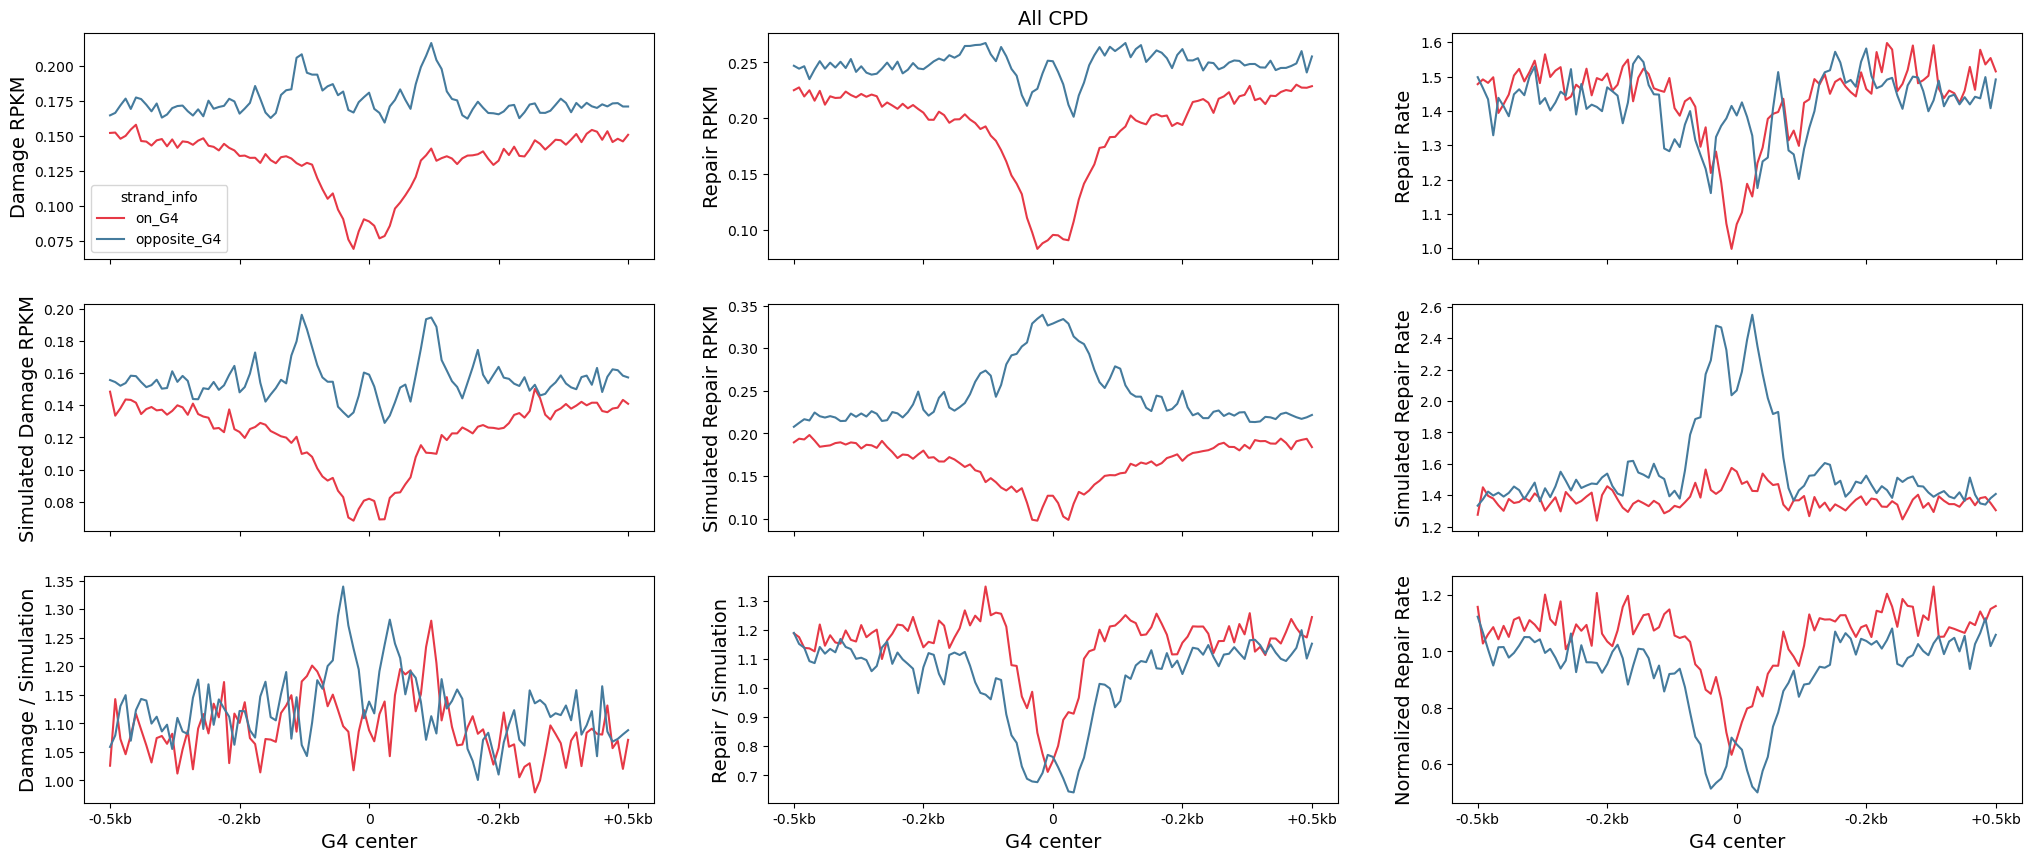

In [12]:
g4_plot(df_repair_agg, list_CPD, "All CPD", p_ticks, p_ticklabs)
plt.show()

In [22]:
metric_rename = {

    'HD64_0_rep3_norm': '0m 64',
    'HD64_15_rep1_norm': '15m 64',
    'HD64_30_rep2_norm': '30m 64',
    'HD64_60_rep2_norm': '60m 64',
    'HD64_240_rep1_norm': '240m 64',
    'HD64_480_rep1_norm': '480m 64',
    'HDC_0_rep3_norm': '0m CPD',
    'HDC_15_rep1_norm': '15m CPD',
    'HDC_30_rep2_norm': '30m CPD',
    'HDC_60_rep2_norm': '60m CPD',
    'HDC_240_rep1_norm': '240m CPD',
    'HDC_480_rep1_norm': '480m CPD',

    # 'HD64_0_rep1_norm': '0m 64 (2022 rep1)',
    # 'HD64_0_rep2_norm': '0m 64 (2022 rep2)',
    # 'HDC_0_rep1_norm': '0m CPD (2022 rep1)',
    # 'HDC_0_rep2_norm': '0m CPD (2022 rep2)',
    # 'HX64_12_rep1_norm': '12m 64 XR (2022 rep1)',
    # 'HX64_12_rep2_norm': '12m 64 XR (2022 rep2)',
    # 'HXC_12_rep1_norm': '12m CPD XR (2022 rep1)',
    # 'HXC_12_rep2_norm': '12m CPD XR (2022 rep2)',
}

metric_color = {
    '0m 64': '#ef476f',
    '15m 64': '#ffd166',
    '30m 64': '#06d6a0',
    '60m 64': '#118ab2',
    '240m 64': '#073b4c',
    '480m 64': 'purple',
    '0m CPD': '#ef476f',
    '15m CPD': '#ffd166',
    '30m CPD': '#06d6a0',
    '60m CPD': '#118ab2',
    '240m CPD': '#073b4c',
    '480m CPD': 'purple',
}

legend_order_2025_64 = ['0m 64', '15m 64', '30m 64', '60m 64', '240m 64', '480m 64']
legend_order_2025_CPD = ['0m CPD', '15m CPD', '30m CPD', '60m CPD', '240m CPD', '480m CPD']


In [23]:
target_list = ['strand_info', 'window'] + list(df.columns[df.columns.str.startswith('H')])
df_agg = df[target_list].groupby(["strand_info", "window"]).mean(numeric_only=True).reset_index()

df_agg_real = df_agg.copy()
df_agg_sim = df_agg.copy()

for column in list(df.columns[df.columns.str.startswith('H') & ~df.columns.str.contains('sim')]):
    df_agg[f"{column}_norm"] = df_agg[column] / df_agg[f"{column}_sim"]
    df_agg_real[f"{column}_norm"] = df_agg_real[column]
    df_agg_sim[f"{column}_norm"] = df_agg_sim[f"{column}_sim"]

    df_agg_real.drop(columns=[column, f"{column}_sim"], inplace=True)
    df_agg_sim.drop(columns=[column, f"{column}_sim"], inplace=True)
    df_agg.drop(columns=[column, f"{column}_sim"], inplace=True)

def melt_and_rename(df):
    df_melted = pd.melt(df, id_vars=['strand_info', 'window'], var_name='metric', value_name='value')
    df_melted['metric'] = df_melted['metric'].map(metric_rename)
    df_melted = df_melted[~df_melted["metric"].isna()]
    return df_melted

df_agg_melted = melt_and_rename(df_agg)
df_agg_real_melted = melt_and_rename(df_agg_real)
df_agg_sim_melted = melt_and_rename(df_agg_sim)

In [29]:
def plot_damage(df_melted, damage, signal):

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), sharey=True)


    if damage == '64':
        legend_order = legend_order_2025_64
    else:
        legend_order = legend_order_2025_CPD


    # Plot TSS
    sns.lineplot(data=df_melted[(df_melted['metric'].str.contains(damage)) & (df_melted['strand_info'] == "on_G4")], 
                x='window', y='value', hue='metric', hue_order=legend_order, palette=metric_color, ax=ax1)
    ax1.set_xlabel('G4 center (bp)')
    ax1.set_ylabel(signal)
    ax1.legend_.remove()  # Remove individual legend
    ax1.set_xticks(p_ticks)
    ax1.set_xticklabels(p_ticklabs)
    ax1.set_title("G4 Strand")


    # Plot TES
    sns.lineplot(data=df_melted[(df_melted['metric'].str.contains(damage)) & (df_melted['strand_info'] == "opposite_G4")], 
                x='window', y='value', hue='metric', hue_order=legend_order, palette=metric_color, ax=ax2)
    ax2.set_xlabel('G4 center (bp)')
    ax2.set_ylabel(signal)
    ax2.legend_.remove()  # Remove individual legend
    ax2.set_xticks(p_ticks)
    ax2.set_xticklabels(p_ticklabs)
    ax2.set_title("Opposite G4 Strand")


    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Make room for the legend

    plt.show()

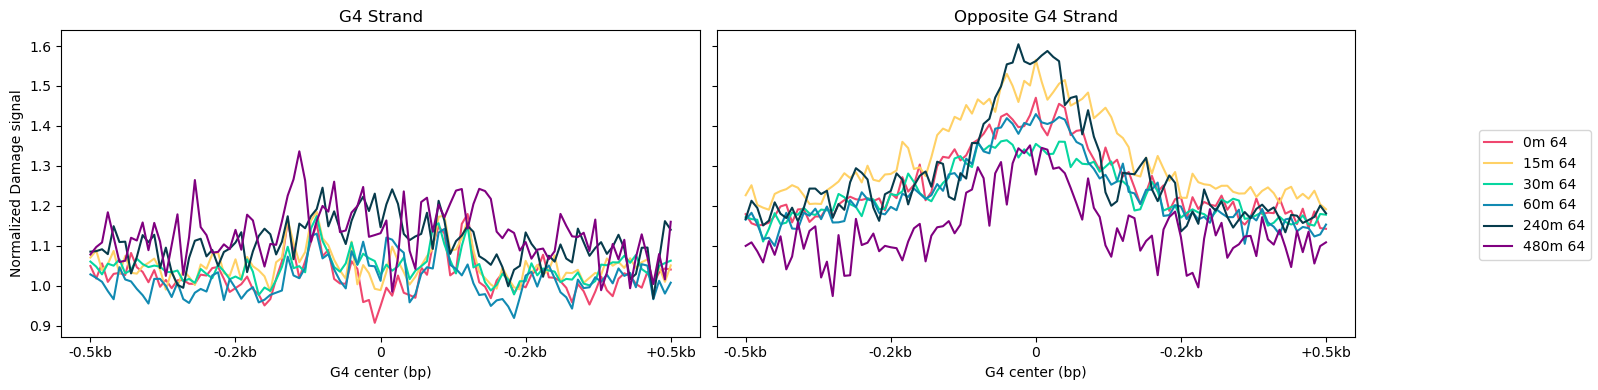

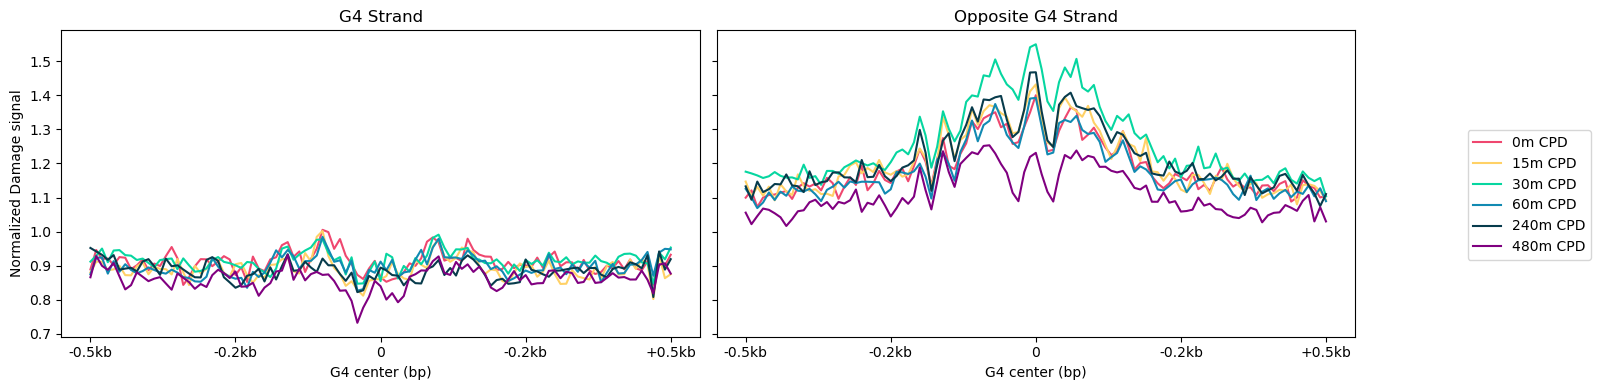

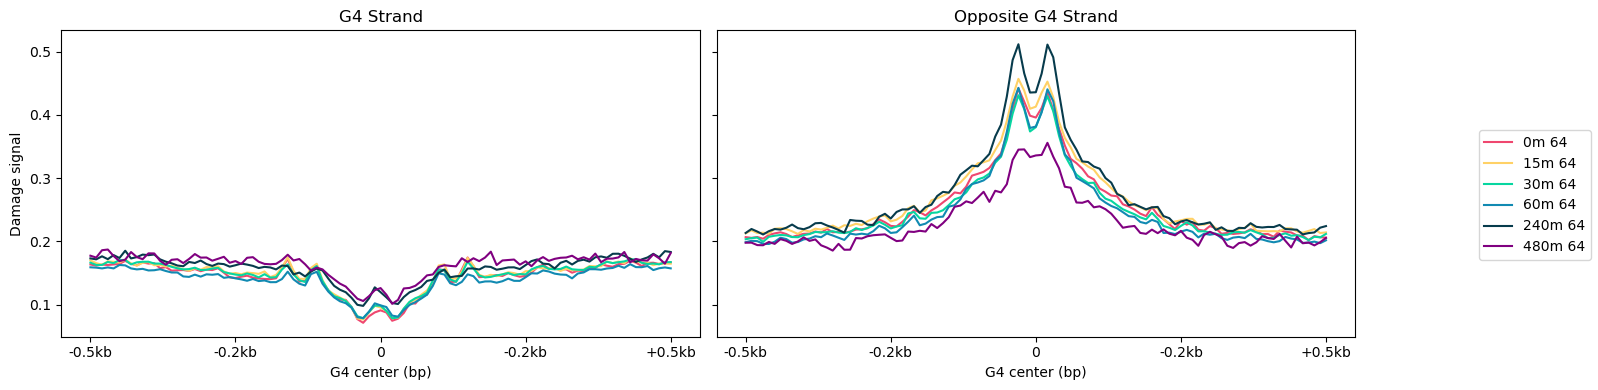

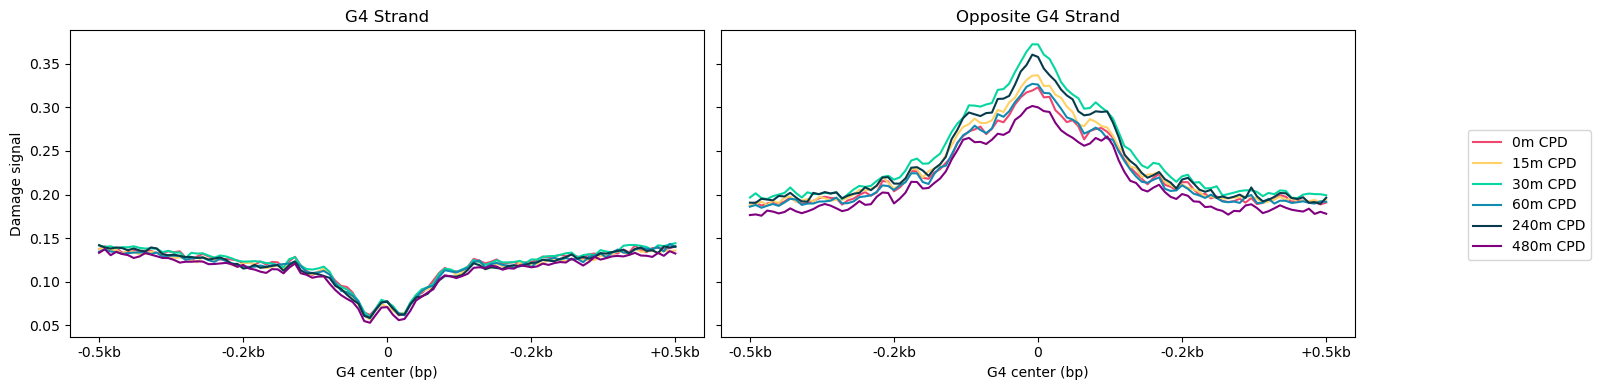

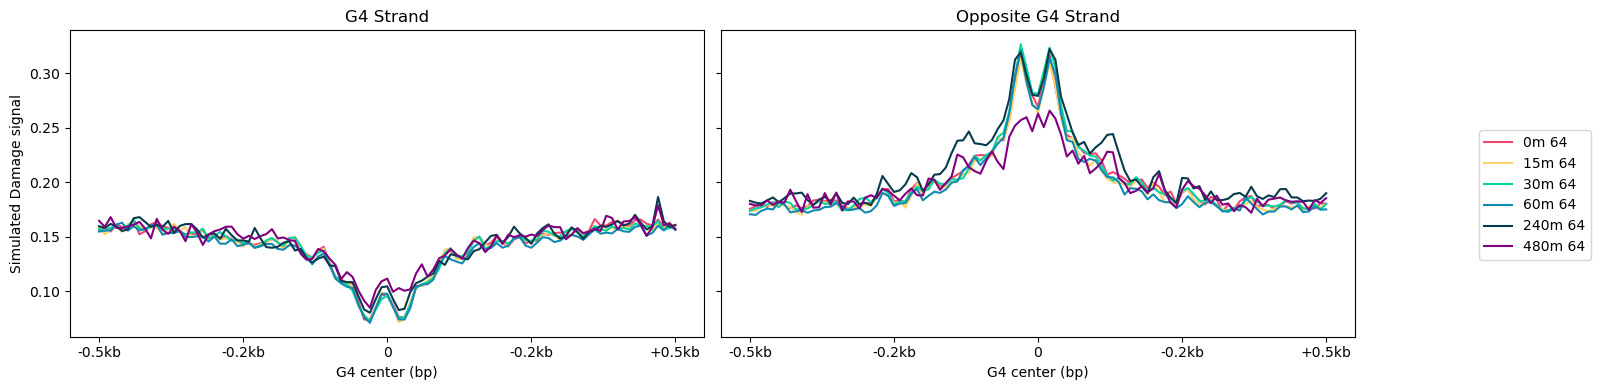

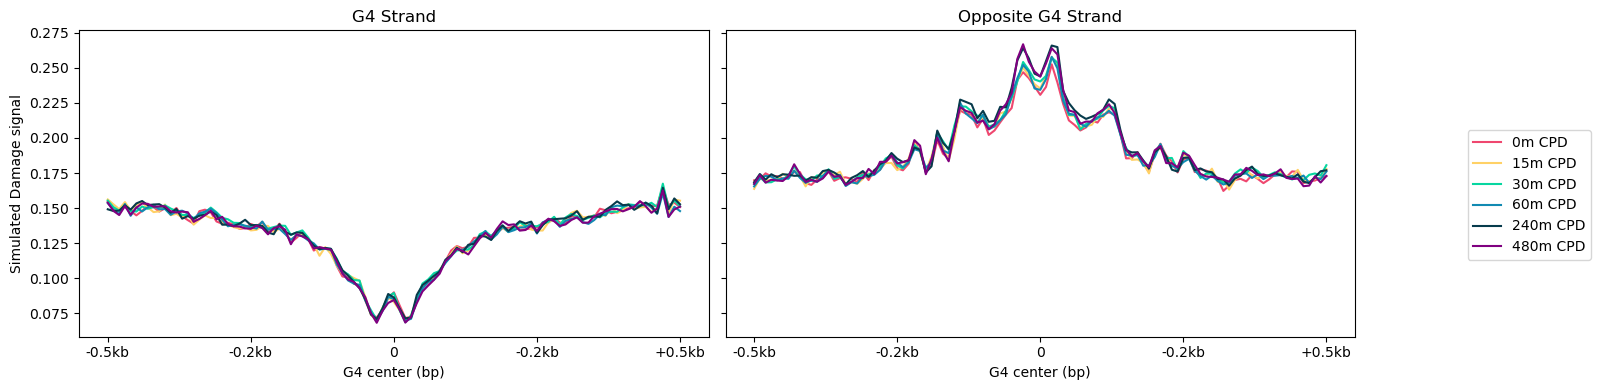

In [30]:
plot_damage(df_agg_melted, '64', 'Normalized Damage signal')
plot_damage(df_agg_melted, 'CPD', 'Normalized Damage signal')

plot_damage(df_agg_real_melted, '64', 'Damage signal')
plot_damage(df_agg_real_melted, 'CPD', 'Damage signal')

plot_damage(df_agg_sim_melted, '64', 'Simulated Damage signal')
plot_damage(df_agg_sim_melted, 'CPD', 'Simulated Damage signal')

,chrom,start,end,name,score,strand,window,dam_strand,HX64_12_rep1,HX64_12_rep2,...,HDC_15_rep1_sim,HD64_30_rep2_sim,HDC_30_rep2_sim,HD64_60_rep2_sim,HDC_60_rep2_sim,HD64_240_rep1_sim,HDC_240_rep1_sim,HD64_480_rep1_sim,HDC_480_rep1_sim,strand_info
0,chr1,888059,888069,region_84156,persistent,+,-50,+,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,on_G4
1,chr1,888059,888069,region_84156,persistent,+,-50,-,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,opposite_G4
2,chr1,888069,888079,region_84156,persistent,+,-49,+,0.0,0.0,...,0.0,2.160128,0.0,0.0,0.0,0.0,0.0,0.0,2.765006,on_G4
3,chr1,888069,888079,region_84156,persistent,+,-49,-,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,opposite_G4
4,chr1,888079,888089,region_84156,persistent,+,-48,+,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,on_G4
